<a href="https://colab.research.google.com/github/Shraddha-gami-source/Machine-Learning/blob/master/Linear_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
# import scipy
# import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("1.03. Dummies.csv")

In [3]:
data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [4]:
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})

In [5]:
data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


##Define dependent and Independent Variable


In [7]:
y=data['GPA']
x1=data[['SAT','Attendance']]

##Regression


In [8]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           2.19e-15
Time:                        05:24:47   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

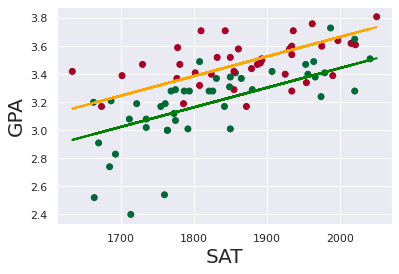

In [13]:
plt.scatter(data['SAT'], data['GPA'], c=data['Attendance'], cmap='RdYlGn_r')
yhat_no=0.0014*data['SAT']+0.6439
yhat_yes=0.0014*data['SAT']+0.8665
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='green', label='regression_line1')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='orange', label='regression_line2')
plt.xlabel('SAT', fontsize='20')
plt.ylabel('GPA', fontsize='20')
plt.show()

##Predictions

In [14]:
x.head()

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0


In [16]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0, 1]})
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [17]:
new_data.rename(index={0:'Alice',1:'Bob'})

,const,SAT,Attendance
Alice,1,1700,0
Bob,1,1670,1


In [20]:
predictions=results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [26]:
predictions_df = pd.DataFrame({'GPA-Predictions':predictions})
joined = new_data.join(predictions_df)
joined.rename(index={0:'Alice',1:'Bob'})

,const,SAT,Attendance,GPA-Predictions
Alice,1,1700,0,3.023513
Bob,1,1670,1,3.204163
